In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.cluster import KMeans, AgglomerativeClustering

In [14]:
#read file
df = pd.read_csv('/Users/liyutenaw/Downloads/wine-clustering.csv')

In [15]:
df.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [16]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [17]:
df.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [18]:
#total number of elements
df.size

2314

In [19]:
df.shape

(178, 13)

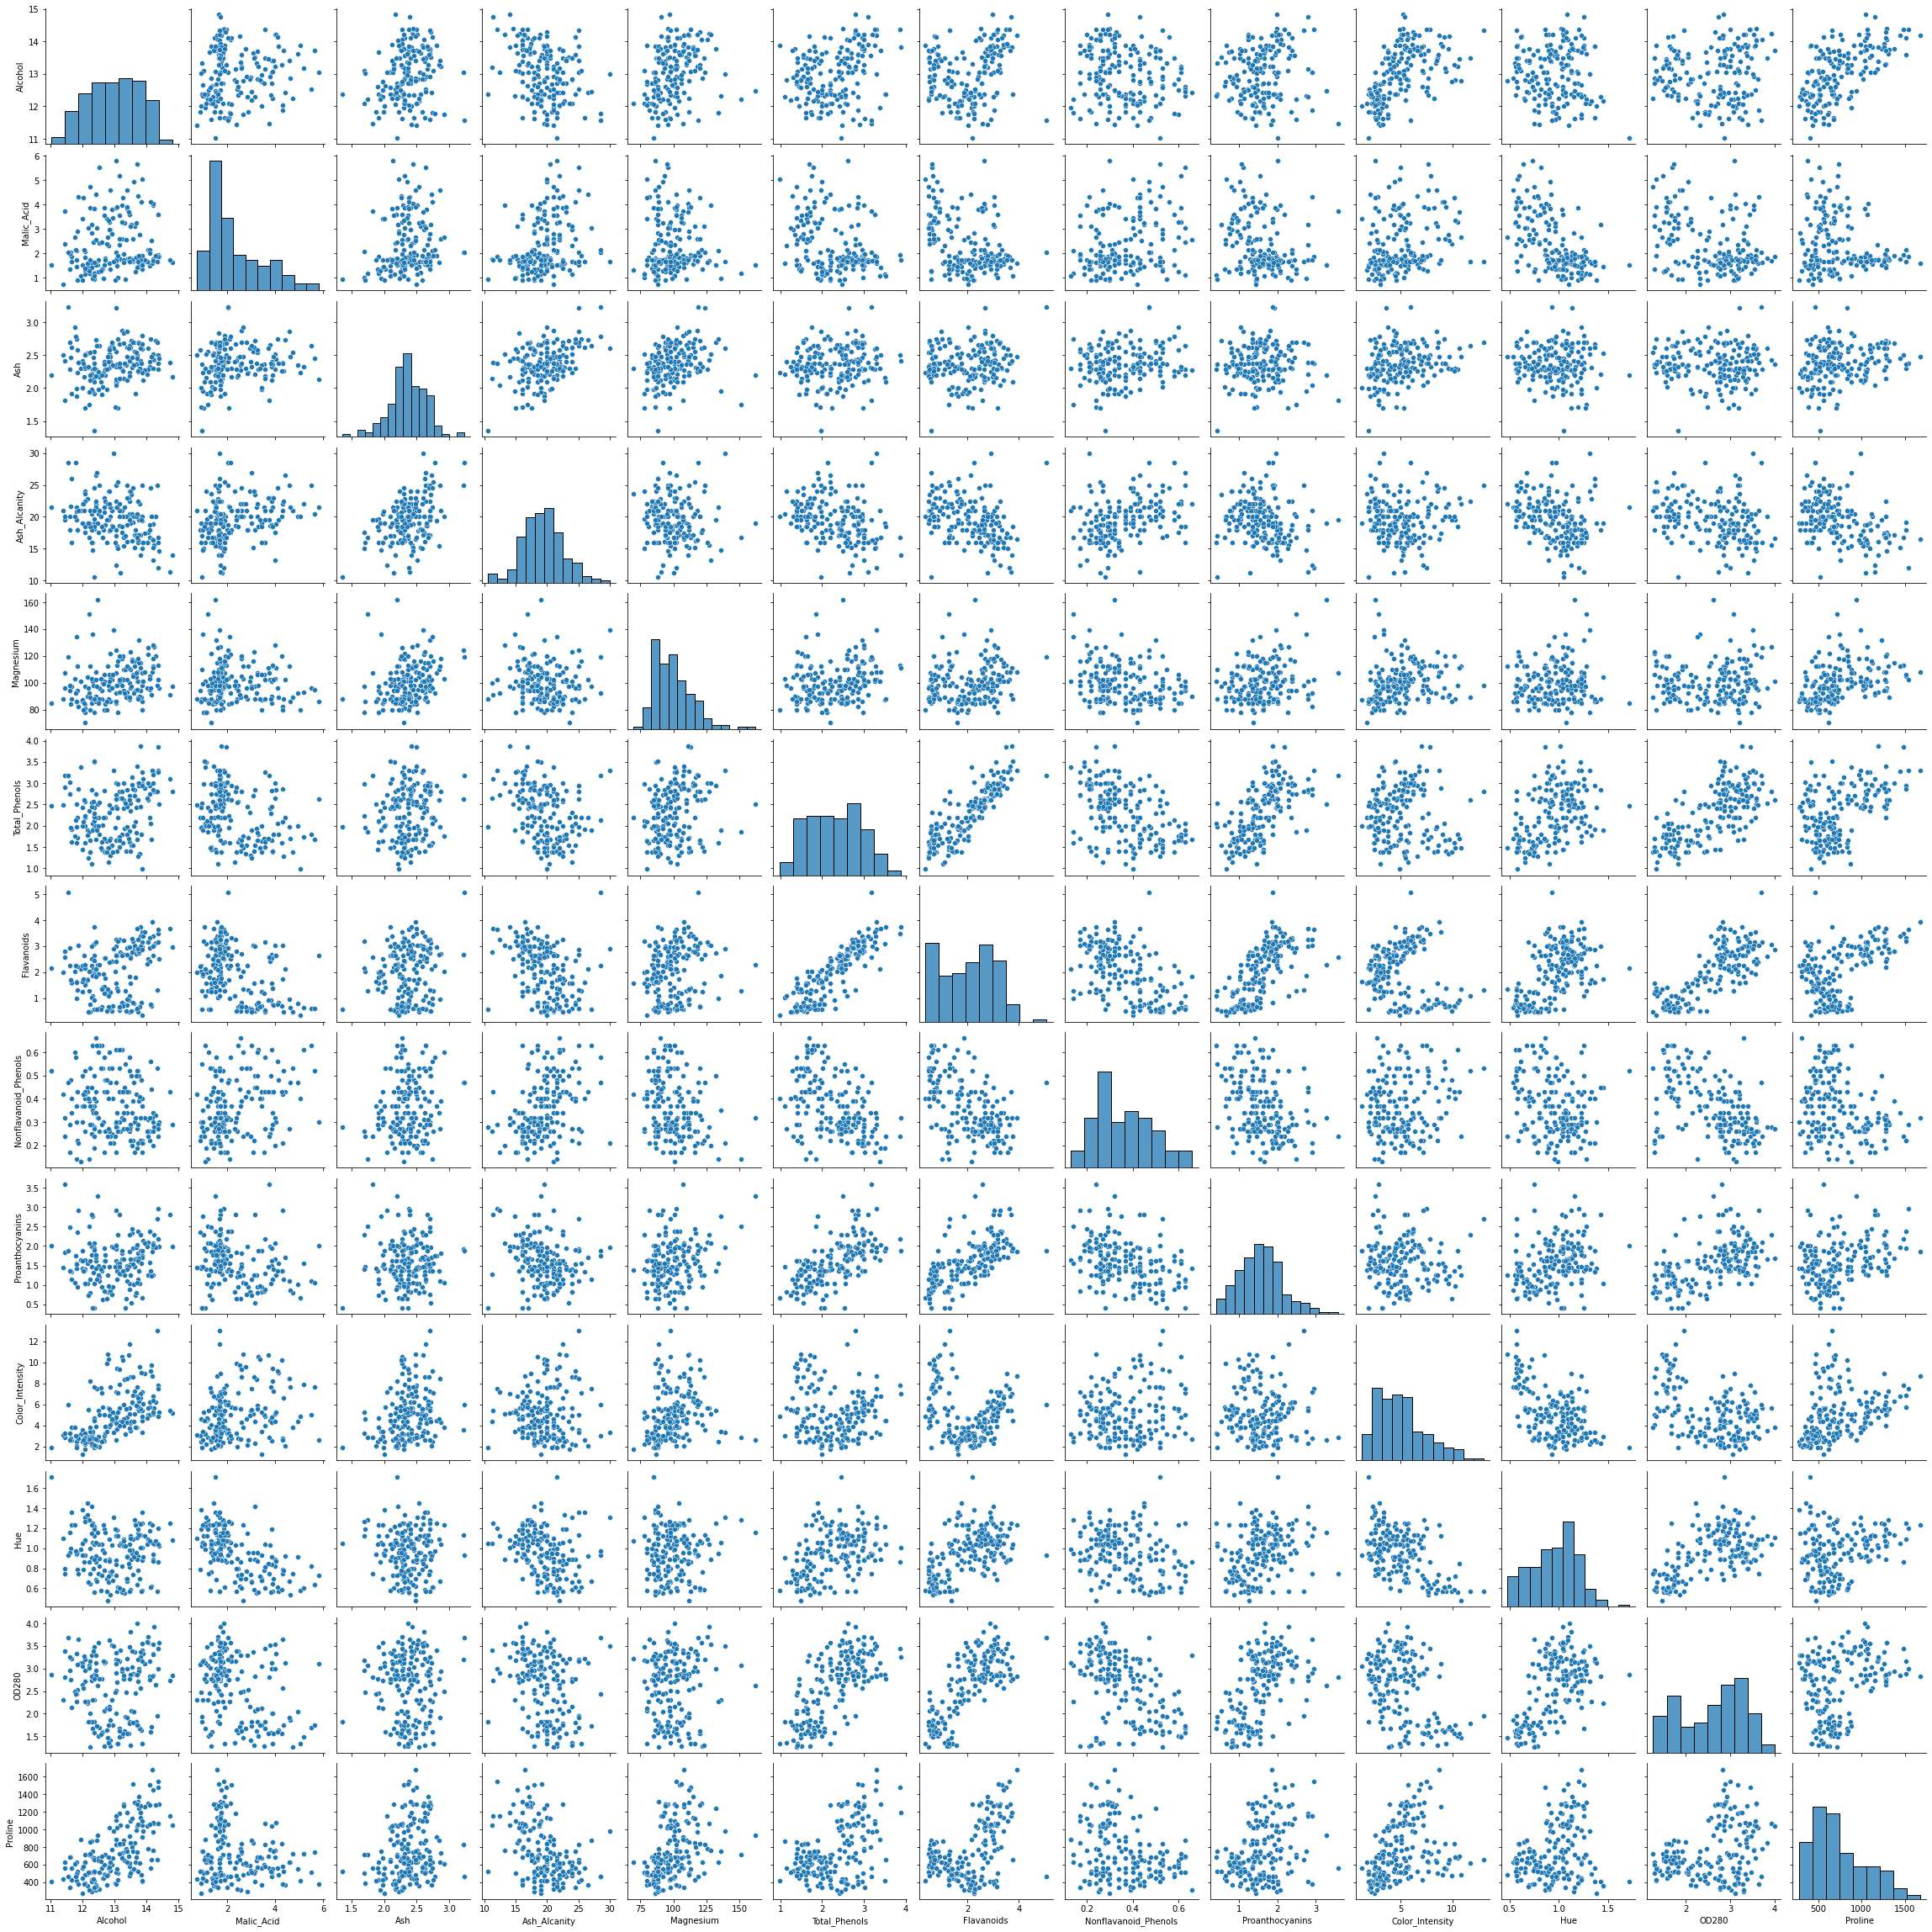

In [20]:
#see relationship exist between feature???
sns.pairplot(df)

<AxesSubplot:xlabel='Ash', ylabel='Color_Intensity'>

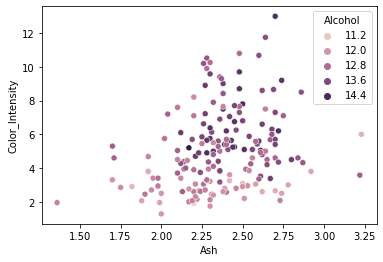

In [21]:
sns.scatterplot(x='Ash', y='Color_Intensity', hue='Alcohol', data=df)

<AxesSubplot:xlabel='Magnesium', ylabel='Color_Intensity'>

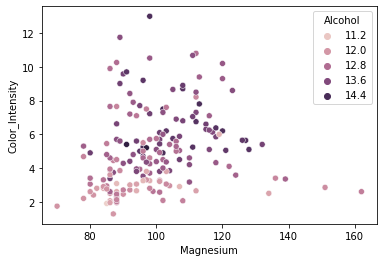

In [22]:
sns.scatterplot(x='Magnesium', y='Color_Intensity', hue='Alcohol', data=df)

<AxesSubplot:xlabel='Magnesium', ylabel='Proline'>

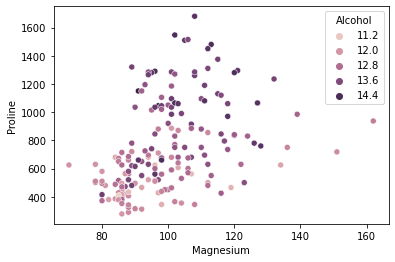

In [23]:
sns.scatterplot(x='Magnesium', y='Proline', hue='Alcohol', data=df)

<AxesSubplot:xlabel='Proline', ylabel='Color_Intensity'>

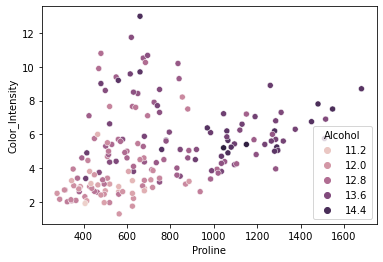

In [24]:
sns.scatterplot(x='Proline', y='Color_Intensity', hue='Alcohol', data=df)

<AxesSubplot:xlabel='Ash', ylabel='Color_Intensity'>

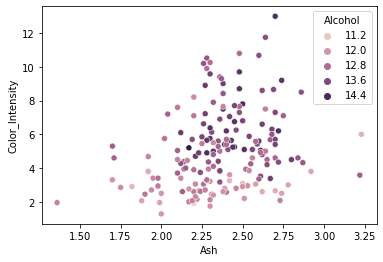

In [25]:
sns.scatterplot(x='Ash', y='Color_Intensity', hue='Alcohol', data=df)

<AxesSubplot:xlabel='Magnesium', ylabel='Color_Intensity'>

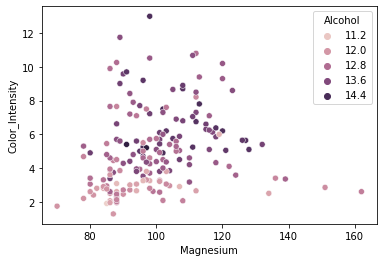

In [26]:
sns.scatterplot(x='Magnesium', y='Color_Intensity', hue='Alcohol', data=df)

<AxesSubplot:>

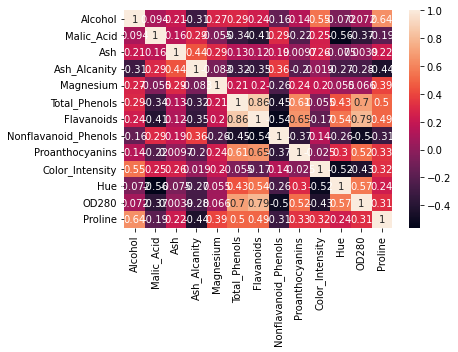

In [27]:
sns.heatmap(df.corr(), annot=True)

### Pre-processing

In [28]:
#check for null
df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [29]:
df['Alcohol'].value_counts()

13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 126, dtype: int64

In [30]:
df.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [31]:
# To back up my experiment, I will create one more column with 2 values
# since mean is 13, we will add one more column that splits wine into 2, strong for > 13 and weak for < 13
#Create strong/weak, I used "13" as the split 
df.loc[df['Alcohol'] >=13 , 'strong/weak'] = 1 
df.loc[df['Alcohol'] <13, 'strong/weak'] = 0

In [32]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'strong/weak'],
      dtype='object')

In [33]:
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  strong/weak  
0     3.92     1065          1.0  
1     3.40     1050          1.0  
2     3.17     1185          1.0  
3     3.45     1480          1.0  
4     2.93      735          1.0  
..     ...      ...          ...  
173   1.74      740          1.0  
174   1.56      750          1.0  
175   1.56      835          1.0  
176   1.62      840          1.0  
177   1.60      560          1.0  

[178 rows x 14 columns]

In [34]:
##Wanted to see maybe if the target was very one way or another but it isn't, it look balanced.
df['strong/weak'].value_counts()

1.0    92
0.0    86
Name: strong/weak, dtype: int64

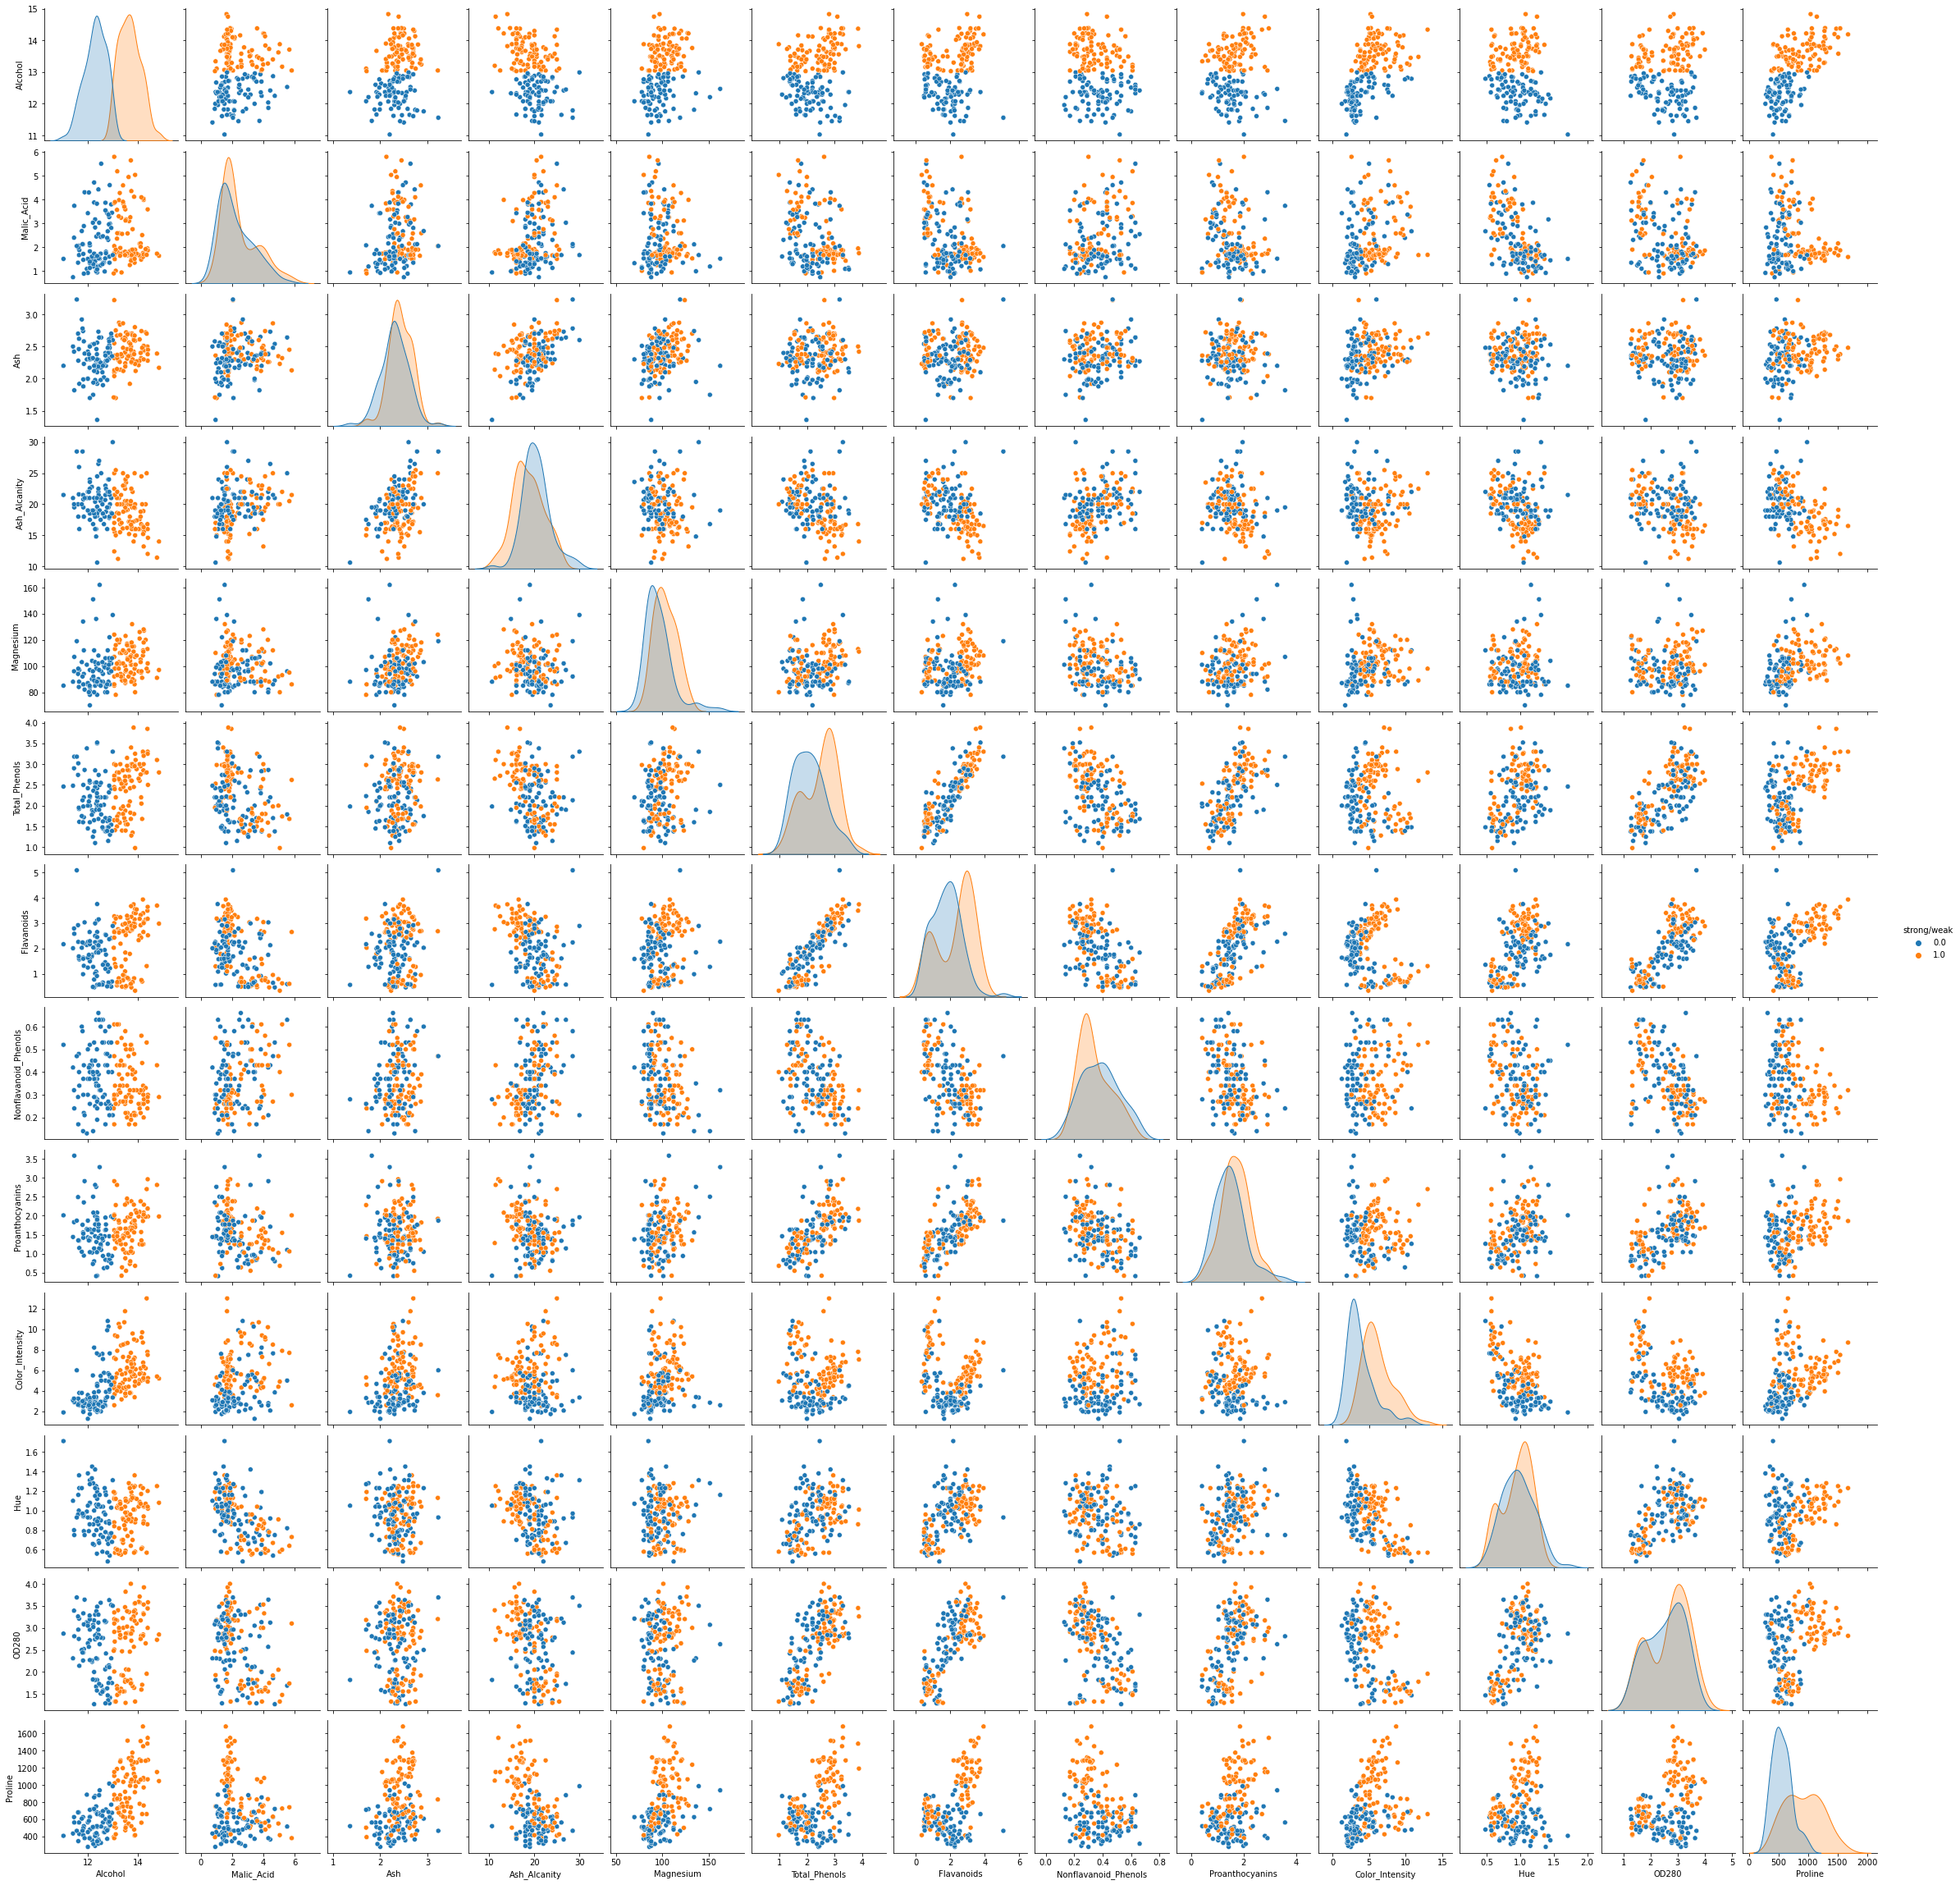

In [35]:
sns.pairplot(df, hue='strong/weak')

<AxesSubplot:xlabel='Magnesium', ylabel='Proline'>

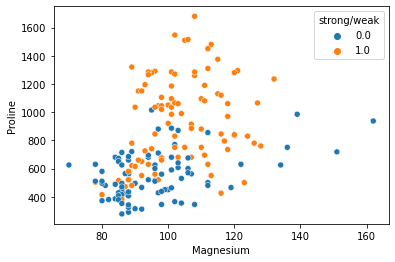

In [36]:
sns.scatterplot(x='Magnesium', y='Proline', hue='strong/weak', data=df)

<AxesSubplot:xlabel='Magnesium', ylabel='Color_Intensity'>

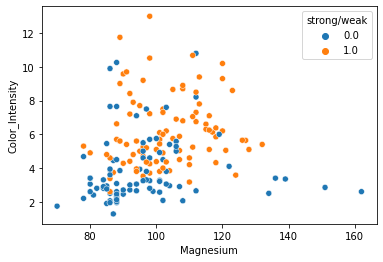

In [37]:
sns.scatterplot(x='Magnesium', y='Color_Intensity', hue='strong/weak', data=df)

<AxesSubplot:xlabel='Proline', ylabel='Color_Intensity'>

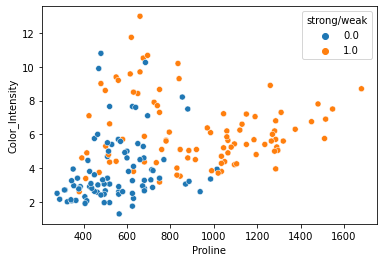

In [38]:
sns.scatterplot(x='Proline', y='Color_Intensity', hue='strong/weak', data=df)

<AxesSubplot:xlabel='Ash', ylabel='Color_Intensity'>

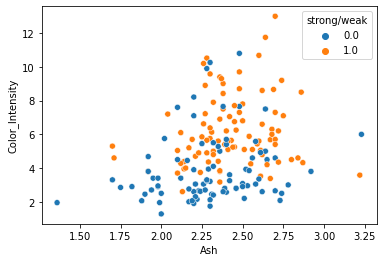

In [39]:
sns.scatterplot(x='Ash', y='Color_Intensity', hue='strong/weak', data=df)

In [40]:
X = df[['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline', 'strong/weak']]

In [41]:
#Create PCA model
pca = PCA(n_components=2)
pca_mdl = pca.fit_transform(X)
pca_df = pd.DataFrame(pca_mdl)

<AxesSubplot:xlabel='0', ylabel='1'>

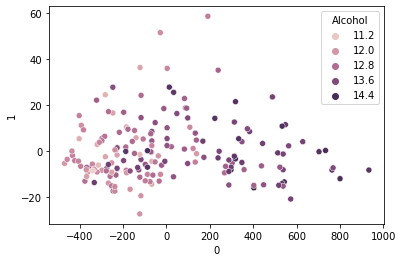

In [42]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Alcohol'])

<AxesSubplot:xlabel='0', ylabel='1'>

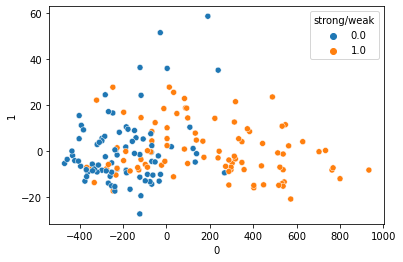

In [43]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['strong/weak'])

<AxesSubplot:xlabel='0', ylabel='1'>

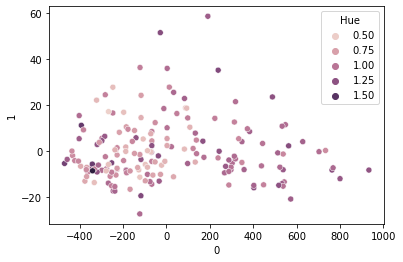

In [44]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Hue'])

<AxesSubplot:xlabel='0', ylabel='1'>

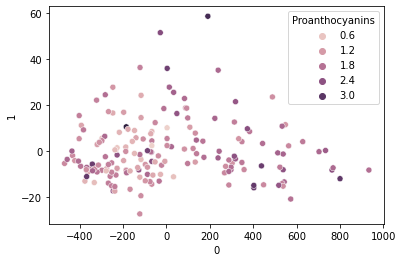

In [45]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Proanthocyanins'])

<AxesSubplot:xlabel='0', ylabel='1'>

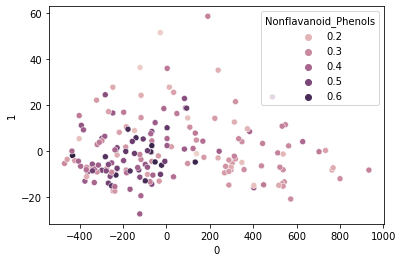

In [46]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Nonflavanoid_Phenols']) 

<AxesSubplot:xlabel='0', ylabel='1'>

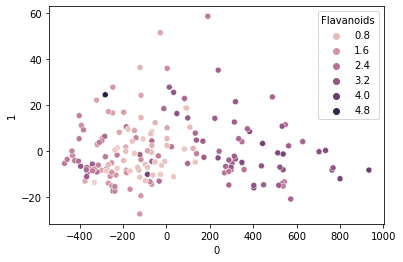

In [47]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Flavanoids']) 

<AxesSubplot:xlabel='0', ylabel='1'>

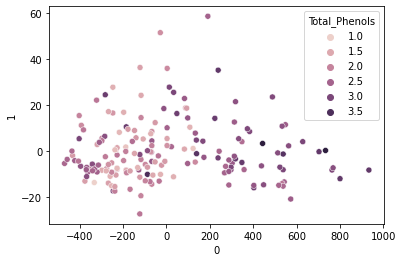

In [48]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Total_Phenols'])

<AxesSubplot:xlabel='0', ylabel='1'>

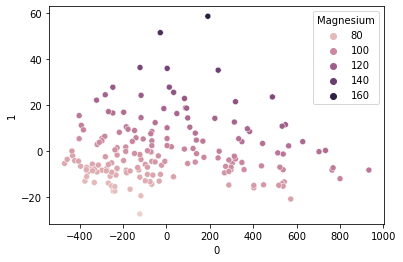

In [49]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Magnesium']) 

<AxesSubplot:xlabel='0', ylabel='1'>

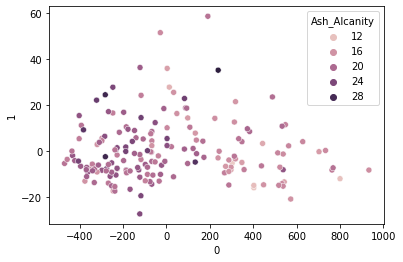

In [50]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Ash_Alcanity'])

<AxesSubplot:xlabel='0', ylabel='1'>

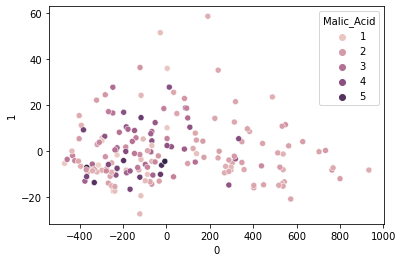

In [51]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Malic_Acid'])

<AxesSubplot:xlabel='0', ylabel='1'>

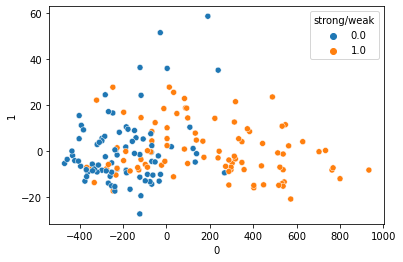

In [52]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['strong/weak'])

<AxesSubplot:xlabel='0', ylabel='1'>

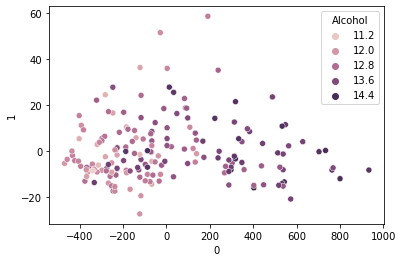

In [53]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Alcohol'])

<AxesSubplot:xlabel='0', ylabel='1'>

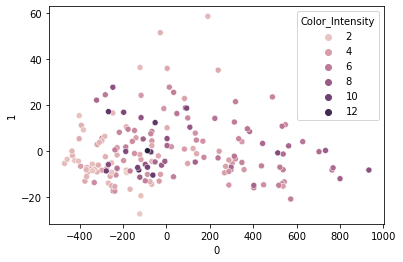

In [54]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Color_Intensity'])

<AxesSubplot:xlabel='0', ylabel='1'>

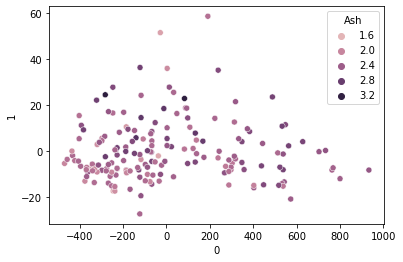

In [55]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=df['Ash'])

In [56]:
# based on the scatterplots. The features that look more relevant are: Proline, Nonflavanoid_Phenols,
# Flavanoids, Magnesium, strong/weak

### K-means clustering

In [57]:
#create KMeans model
kmeans = KMeans(n_clusters=2, random_state=1).fit(X)

In [58]:
y = kmeans.fit_predict(X)

<AxesSubplot:xlabel='Nonflavanoid_Phenols', ylabel='Magnesium'>

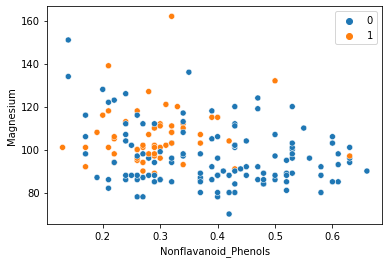

In [59]:
sns.scatterplot(x = df['Nonflavanoid_Phenols'], y = df['Magnesium'], hue=y)

<AxesSubplot:xlabel='0', ylabel='1'>

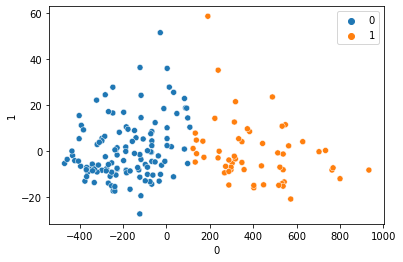

In [60]:
sns.scatterplot(x = pca_df[0], y = pca_df[1], hue=y)

<AxesSubplot:xlabel='Proline', ylabel='Magnesium'>

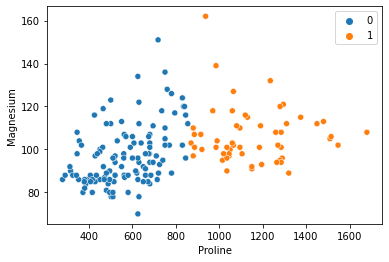

In [61]:
sns.scatterplot(x = df['Proline'], y = df['Magnesium'], hue=y)

In [62]:
#add our clusters back to the original DataFrame so we can take a look at some of the items.
y_df = pd.DataFrame(y, columns=['Cluster'])
new_df = pd.concat([df, y_df], axis=1)

In [63]:
new_df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  strong/weak  Cluster  
0     3.92     1065          1.0        1  
1     3.40     1050          1.0        1  
2     3.17     1185          1.0        1  
3     3.45     1480          1.0        1  
4     2.93      735          1.0        0  
..     ...      ...          ...      ...  
173   1.74      740          1.0        0  
174   1.56      750          1.0        0  
175   1.56      835          1.0        0  
176   1.62      840          1.0        0  
177   1.60      560          1.0        0  

[178 rows x 15 columns]

In [64]:
# Install plotly
!pip install plotly

In [65]:
import plotly.express as px

In [66]:
fig = px.scatter(pd.concat([new_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster', hover_data=['Proline','Magnesium','Nonflavanoid_Phenols','Flavanoids', 'strong/weak'])
fig.show()

### Agglomerative Clustering

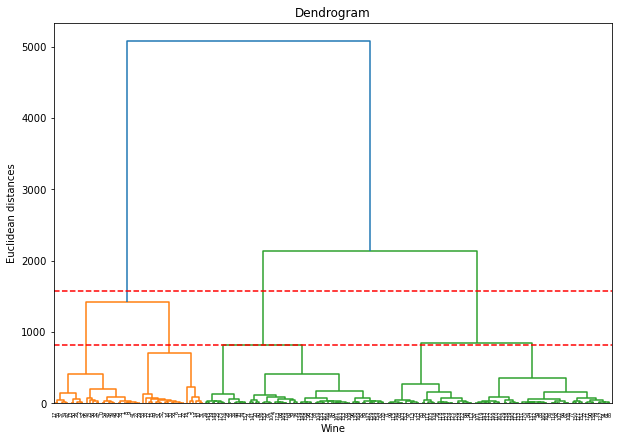

In [67]:
#Create and display a dendrogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title('Dendrogram')
plt.xlabel('Wine')
plt.ylabel('Euclidean distances')
plt.axhline(y=825, color='r', linestyle='--')
plt.axhline(y=1575, color='r', linestyle='--')
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [68]:
#Implement model
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  

In [69]:
#fit and create prediction
y_agglo = agglo.fit_predict(X)

<AxesSubplot:xlabel='Proline', ylabel='Magnesium'>

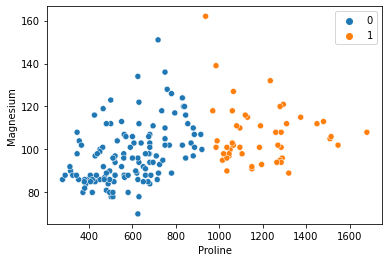

In [70]:
sns.scatterplot(x = df['Proline'], y = df['Magnesium'], hue=y_agglo)

<AxesSubplot:xlabel='Proline', ylabel='Magnesium'>

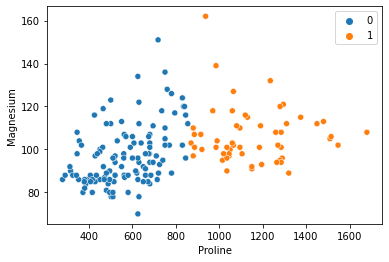

In [71]:
sns.scatterplot(x = df['Proline'], y = df['Magnesium'], hue=y)

In [72]:
y_a_df = pd.DataFrame(y_agglo, columns=['Cluster (Agglomerative)'])
new_a_df = pd.concat([df, y_a_df], axis=1)

In [73]:
fig = px.scatter(pd.concat([new_a_df, pca_df], axis = 1), 
                 x = 0, y = 1, color='Cluster (Agglomerative)', hover_data=['Proline','Magnesium','Nonflavanoid_Phenols','Flavanoids', 'strong/weak'])
fig.show()